# MTH 9879 Market Microstructure Models,    Spring 2015 

## Lecture 1: Market mechanisms and zero intelligence models of the order book

Tai-Ho Wang    
Department of Mathematics   
  
  
<h2><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2014/09/BCCUNYstacked_BLK.jpg" align = "center" width=160></h2>  

$$
\newcommand{\bea}{\begin{eqnarray}}
\newcommand{\eea}{\end{eqnarray}}
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\F}{\mathcal{F} }
\newcommand{\cF}{\mathcal{F} }
\newcommand{\E}{\mathbb{E} }
\newcommand{\Eof}[1]{\mathbb{E}\left[ #1 \right]}
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\p}{\partial}
\newcommand{\PP}{\mathbb{P} }
\newcommand{\Pof}[1]{\mathbb{P}\left[ #1 \right]}
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\R}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
\newcommand{\Hess}{\mathrm{Hess} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bit}{\begin{itemize}}
\newcommand{\eit}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\tr}{\mbox{tr}}
$$


## Outline of Lecture 1

* Overview of the course

* Market structure

    * Order types
    
    * Market types
    
    * Trading venues

* A brief introduction to R

* Zero intelligence models


## Why study market microstructure?

* To understand better how to trade: Specifically, how to design algorithms.

    * Market microstructure theory could be viewed as the theory underlying algorithmic trading.

* To be able to talk to informed clients.

* To understand the process of price formation.


## Aims of this course

* To be able to read and understand market microstructure literature.

    * In particular, to be familiar with well-known microstructure models.

* To be familiar with empirical characteristics of order books and time series, understanding their implications for modeling and trading.

## Philosophical overview

* Two extreme views of the market:
    
    * Completely random
        
        * The zero intelligence model associated with econophysics.
        * Use of statistical physics techniques.

    * Completely rational
        * Strategic trader models associated with efficient markets theory.
        * Game theoretic solutions.

* Reality is somewhere in-between.

## Order types

Two basic order types:

* Market orders
    * Always executed if there is sufficient quantity available.

* Limit orders
    * May be executed only if limit price reached (note "may" not "will"!).
    * Typically priorities are price first, then time.


There are many variations such as:

* Fill or kill: Must be entirely filled immediately or not at all

* Immediate or cancel: Fill immediately; remaining quantity is canceled

* All or nothing: Must be entirely filled or not at all when the price is reached

* Marketable limit buy order: Buy at limit price but no higher.  Remaining quantity becomes best bid.


## Hidden orders

* Users may post hidden limit orders

* Hidden orders have lower priority than visible orders at the same price level.

* Hidden orders are often placed between the visible bid and ask prices so market order submitters may sometimes get a price that is better than the visible best quote.

## Market types

* *Quote-driven* markets

    * have market makers  responsible for continuously quoting two-way prices
    * For example ISE.

* Liquidity in order-driven markets is generated by customer order flow.

    * Limit orders in the book replace market-maker quotes.

* Hybrid markets such as the NYSE are mixtures of both.

    * For example, specialists are still responsible for ensuring two-way quotes in times of stress.

## Auction types

Two basic types:

* Batch auctions or *call markets*

    * For example, opening and closing auctions on NYSE.
    
    * Trading takes place only when the market is called.
        * Prices are "called out" until a price is found that maximizes the quantity traded.


* Continuous auction or *continuous markets*

    * For example trading during the day on NYSE.
    * Trades can take place whenever the market is open.
    * In a continuous market, the limit order book effectively defines supply and demand curves for the asset being traded.


## NYSE opening auction example

Table 1: Example:  9:30am ET: Previous closing price of \$17.00

| Entry Time | Buy Limit Orders | Sell Limit Orders | Order Price | Matchable | Imbalance | Indicative Price |
|:----------:|:----------------:|:-----------------:|:-----------:|:---------:|:---------:|:----------------:|
|    8:30    |       1,000      |                   |    \$19.00   |     0     |     0     |         -        |
|    9:00    |                  |       1,000       |    Market   |   1,000   |     0     |      \$19.00      |
|    9:05    |       1,000      |                   |    \$20.00   |   1,000   |     0     |      \$20.00      |
|    9:25    |                  |       1,000       |    \$18.00   |   2,000   |     0     |      \$18.00      |

* The match price is the price that maximizes the volume that can be executed.

* There are complicated rules for tie-breaking that vary between exchanges.

## Continuous trading

* In the continuous trading session, orders are submitted and canceled. 

* The set of orders with signs, sizes and prices is known as the *limit order book*.

* We proceed to give a few snapshots of the BATS order book.

    * BATS is the third largest US exchange after NYSE and Nasdaq.  It has the reputation of being the fastest exchange.

## Trading venues

In the US, trading takes place on

* Organized exchanges such as NYSE and Nasdaq.
    * Trading can be electronic via an ECN.
    * Prices are formed through an auction process.

* Crossing networks such as POSIT
    * Crosses occur eight times daily on POSIT with a *derivative* pricing rule

* Dark pools with derivative pricing rules
    * Banks' internal crossing networks such as SIGMA X, Crossfinder, MLXN
    * Other dark pools such as GETMatched (Getco), BIDS, Level etc.



This excerpt taken from the ITG 10-K filed Mar 1, 2007.

---

**POSIT**

ITG POSIT crossing destinations, including POSIT Match, POSIT Now, and BLOCKalert, give buyers and sellers opportunities to match equity orders with complete confidentiality, no market impact, and the cost savings of midpoint pricing. POSIT offers unique value for traders with active, quantitative, and passive trading styles. POSIT provides access to rich, diverse liquidity, is useful for all trading styles and is especially valuable for trading small, illiquid names. All POSIT products cross at the midpoint of the National Best Bid or Offer (“NBBO”).

## BATS (BZX) order book for MSFT

<h2><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/01/BZX_MSFT.png" align = "center" width=750></h2>


## BATS (BYX) order book for MSFT

<h2><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/01/BYX_MSFT.png" align = "center" width=750></h2>


## BATS (BZX) order book for BAC

<h2><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/01/BZX_BAC.png" align = "center" width=750></h2>


## BATS (BYX) order book for BAC

<h2><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/01/BYX_BAC.png" align = "center" width=750></h2>


## BATS (BZX) order book for GOOG

<h2><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/01/BZX_GOOG.png" align = "center" width=750></h2>


## BATS (BYX) order book for GOOG

<h2><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/01/BYX_GOOG.png" align = "center" width=750></h2>


## BZX and BYX

* BZX gives a rebate to limit order submitters
    * There is an incentive to place limit orders so the size at best quote is large.
    * Market orders are small.

* BYX gives a rebate to market order submitters.
    * Queue sizes are smaller.
    * Market orders are bigger.

* Because of different fee structures on different exchanges, the displayed spread is not the true spread.

## BZX fee schedule

<h2><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/01/bzx.png" align = "center" width=750></h2>


## BYX fee schedule

<h2><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/01/byx.png" align = "center" width=650></h2>

## Large and small tick stocks

* Stocks where the tick size is large relative to the price movement per trade are *large tick* stocks. Stocks where the tick size is small relative to the price movement per trade are *small tick* stocks.
    * BAC is a large tick stock.
    * GOOG is a small tick stock.
    * MSFT is a large tick stock.

* A large tick stock has a spread of one tick nearly all of the time.

* Conversely, the spread of a small tick stock is typically greater than one tick (one cent in the US).



## The SFGK zero-intelligence model

In this model due to Smith, Farmer, Gillemot and Krishnamurthy:

* Limit orders can be placed at any integer price level $p$ where $-\infty < p < \infty$.
    * If worried about negative prices, think of these as being logarithms of the actual price.

* Limit sell orders may be placed at any level greater than the best bid $B(t)$ at time $t$ and limit buy orders at any level less than the best offer $A(t)$.

* In particular, just as in real markets, limit orders may be placed inside the spread (if the current spread is greater than one tick).

* Market orders arrive randomly at rate $\mu$.

* Limit orders (per price level) arrive at rate $\alpha$.

* A proportion $\delta$ of existing limit orders is canceled.

* All market orders and limit orders are for one share.

*  All the order flows are modeled as Poisson processes. 

## Analysis of the SFGK order book model

* The SFGK model depends on so few parameters that, even though it is capable of generating complex behavior, it remains amenable to analytical investigation.

* For example, it is easy to see that the asymptotic book depth far away from the best quote must be given by $\alpha/\delta$.

The argument goes as follows:


## Asymptotic book depth

* In the steady-state, orders arriving into the book must balance orders leaving the book.

* Far away from the best quote, the probability of a limit order leaving the book as the result of an execution against a market order is very small.

* Thus we need only consider new orders arriving balancing existing orders leaving due to cancelation. 
    * At a given price, for a fixed time interval $\Delta$, the expected number of orders arriving is $\alpha \Delta$ and the expected number of orders canceled is $\delta d\Delta $ where $d$ is the number of shares at the book at that price level.    
    * For these to balance, we must have $\alpha \Delta= \delta d\Delta$, or equivalently,
     $$
     d=\frac{\alpha}{\delta}.
     $$

## Complex interactions

* Although the model is simple to describe, its behavior can be rather complex.

* For example, suppose there is one share at the best bid when the spread is two ticks.
    * If a new buy order is placed inside the spread one tick below the best offer $A(t)$, the best bid $B(t)$ increases and the spread $s(t)$ decreases to one tick. 
    
    * If a market sell order arrives, the book will revert to its initial state.

* Now suppose that the same events occur but in the reverse order.
    * The market sell order increases the spread to three ticks and a new limit buy order is placed one tick below the best offer.
    
    * The spread decreases to one tick.

* The resulting book shape and even the mid-quote are quite different.

## Distribution of order depth

* In the SFGK model, the distribution of order depth is a function of distance to the best quote.
    * Conditional on no change in the best quotes, order depth would be i.i.d at any given level of the book deeper
    than the best quote.
    
    * In fact, as shown by SFGK, this distribution is Poisson with mean $\alpha/\delta$. 
    
    * However, as the order book evolves, the best quote prices do move, and each level in the book retains some memory of having been "visited" by the market price at some prior time.

* Strictly speaking, order depth distributions are therefore conditional on the entire history of the order book and in particular on the distance to the best quote.

* The further away a given level is from the best quote, the closer the order depth distribution will be to Poisson.

## Dimensional analysis

* Dimensional analysis is a favorite tool of physicists used to guess the relationships between model outputs and parameters.
    * Effectively using information about scaling relationships.

* The dimensions of the parameters of the SFGK model are as follows:

| Parameter | Dimensions       |
|:-----------:|:------------------:|
|    $\mu$       | shares/T        |
|    $\alpha$       | shares/(ticks T) |
|    $\delta$       | 1/T              |

* In the following we use these parameter dimensions to guess the functional form of relationships between measurable quantities of interest and the input parameters.

## Inverse table

* For convenience, we provide (unique) expressions for dimensions in terms of input parameters.

* Inverting the previous table gives

| Dimensions | Parameter combinations |
|:----------:|:----------------------:|
|   shares   |        $\mu$ / $\delta$       |
|      T     |    1 / $\delta$    |
|    ticks   |           $\mu$ / $\alpha$          |

## Asymptotic book depth

* The asymptotic depth $d$ of the book far away from mid-market has the dimensions of $shares$ per $tick$.  The only combination of parameters with these dimensions is $\alpha/\delta$.

* As we saw earlier, the exact result is in fact just $\alpha/\delta$ so the guess in this case is exactly correct.


## The spread

* The spread has dimensions of $ticks$ and the only combination of parameters with these dimensions is $\mu/\alpha$.

* Arguing more directly, inside the spread, limit orders are mostly removed by market orders.
    
    * The total rate of arrival of limit orders is $2\,\alpha\,s$ where $s$ is the steady-state spread because as explained earlier, buy and sell orders may be placed at all levels at the spread or better.
    
    * The rate of removal of limit orders is just the rate of market orders $\mu$.

* We deduce that (roughly at least)
    $$
    s \sim \frac{\mu}{2\,\alpha}
    $$

## The slope of the order book

* This quantity has dimensions of $shares$ per $tick$ per $tick$ (the derivative with respect to ticks of the limit order density).

* The only combination of parameters that has these dimensions is
    
    $$
    \frac{\alpha^2}{\mu\,\delta}.
    $$


## Volatility

* The variance of the times series of trade prices generated in this model must have dimensions $ticks^2/T$.


* Dimensional arguments imply that variance per unit time must therefore be proportional to

    $$
    \frac{\mu^2\,\delta}{\alpha^2}
    $$


* Thus volatility must scale as
    
    $$
    \frac{\mu\,\sqrt{\delta}}{\alpha}
    $$

## Average quote size

* The average quote size $Q$ should be given roughly by the cumulative steady-state inventory $s/2$ ticks away from mid-market where $s$ is the average spread.

* Thus
    
    $$
    Q \sim s^2\,\frac{\alpha^2}{\mu\,\delta} \sim
    \frac{\mu^2}{\alpha^2}\,\frac{\alpha^2}{\mu\,\delta}=\frac{\mu}{\delta}
    $$
    
    as we would expect because once again, ${\mu}/{\delta}$ is the only combination of parameters with dimensions of $shares$.



## Characteristic share quantity

The only quantity that can be formed from the model parameters with
the dimensions of $shares$ is the characteristic share quantity

$$
N_c=\frac{\mu}{2\,\delta}
$$

## Market impact

The most familiar market impact model is $\sigma\,\sqrt{L}$ where $\sigma$ is volatility the liquidity $L$ is fraction of average daily volume.  In this model, for a given number of shares $n$,

$$
L=\frac{n}{\mu}
$$

and as shown above

$$
\sigma \sim \frac{\mu\,\sqrt{\delta}}{\alpha}
$$

Re-expressing that model of market impact in terms of the parameters
of the SFGK model gives

$$
I(n) \sim
\frac{\mu\,\sqrt{\delta}}{\alpha}\,\sqrt{\frac{n}{\mu}}=\frac{1}{\alpha}\,\sqrt{{\mu\,\delta\,n}}
$$

which has the correct dimensions of $ticks$.

## Market impact

* In general, no matter what the form of market impact, for a given number of shares $n$ the impact must have dimensions of $ticks$.


* The only combination of parameters with dimensions of $ticks$ is ${\mu}/{\alpha}$.


* We deduce that the general form of market impact must be

    $$
    I(n)\sim\frac{\mu}{\alpha}\,f\left(\frac{n}{N_c}\right)=\frac{\mu}{\alpha}\,f\left(\frac{2\,\delta\,n}{\mu}\right)
    $$
    
    for some function $f(.)$.


* Clearly, the square-root model of market impact is consistent with this.



## Realism of SFGK model

* In real markets,  order depth falls off rapidly away from the best quote. 


* We would therefore not expect the behavior of the SFGK model deep in the order book to accurately mimic a real market.


* However, close to the best quote, the SFGK model *does* appear to capture some salient aspects of real markets.


* For example:

    * A model in a similar style was shown by Bollerslev, Domowitz and Wang to accurately predict the distribution of bid-offer spreads in the foreign exchange market.
    
    * Farmer, Patelli and Zovko estimated $\mu$, $\alpha$ and $\delta$ from London Stock Exchange SETS order book data, comparing average actual bid-offer spreads and volatilities against SFGK model predictions and finding agreement to be quite good.


* As we shall see, there are inevitably some aspects of real markets that zero-intelligence models cannot mimic, notably those associated with strategic behavior of traders.


## Implementation of the SFGK model

* It is impossible to simulate order arrivals and cancelations at integer price levels from $-\infty$ to $+\infty$.


* So consider only order arrivals and cancelations in a moving band of width $L$ centered around the current best quotes.

    * $L$ should be chosen conservatively so as to ensure minimal edge effects.
    * Within the band, the arrival rate of limit orders is $\alpha$, cancelation rate is $\delta$ times outstanding shares.
    * Outside the band, orders may neither arrive nor be canceled.


## Notation

Table 2: Order book events

|       Event       | Notation |
|:-----------------:|:--------:|
|  Limit buy order  |    LB    |
|  Market buy order |    MB    |
|  Cancel buy order |    CB    |
| Market sell order |    MS    |
|  Limit sell order |    LS    |
| Cancel sell order |    CS    |

We denote the probability of an event by $\PP_{event}$

## SFGK pseudo-code



<font color="red">
- Compute the best bid $B(t)$ and best offer $A(t)$.

- Compute the number $n_{B}$ of shares on the bid side of the book from level $A(t)-1$ to level
$A(t)-L$.

- Compute the number $n_{A}$ of shares on the offered side of the book
from level $B(t)+1$ to level $B(t)+L$.

- Draw a new event according to the relative probabilities
$
\left\{\PP_{MB}, \PP_{MS},
\PP_{LB}, \PP_{LS}, \PP_{CS}, \PP_{CB}\right\} \propto \left\{\mu/2, \mu/2,
L\,\alpha, L\,\alpha, \delta\,{n_A}, \delta\,{n_B} \right\}
$.

    - If the selected event is a limit order, draw the relative
price level from $\left\{1,2,\ldots,L\right\}$.
    - If the selected event is a cancelation, select randomly which order within the band to cancel.
- Update the order book and increment $t$.

## Ouputs of simulation

This simulation procedure yields a time series of order book data from which we extract
quantities of interest such as spread, mid-quote etc.
<h2><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/01/ZI-price.png" align = "center" width=700></h2>
Figure 1: A typical sample path

## Introduction to R

There are many places to learn about R.  I recommend:

* *Introductory Statistics with R* by Peter Dalgaard


* *R for Beginners* by Emmanuel Paradis available at http://cran.r-project.org/doc/contrib/Paradis-rdebuts_en.pdf


* *R for MATLAB users* available at http://mathesaurus.sourceforge.net/octave-r.html


## R implementation of ZI simulation

In [1]:
%load_ext rpy2.ipython

In [2]:
%%R
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/01/ziSetup.zip", destfile="ziSetup.zip")
unzip(zipfile="ziSetup.zip")

In [6]:
%%R 
source("ziSetup.R")

## What inside *ziSetp.R*

In [ ]:
%%R
#Book setup
L <- 30 #Set number of price levels to be included in iterations

# Generate initial book
LL <- 1000 #Total number of levels in buy and sell books

# Initialize book with asymptotic depth of 5 shares
initializeBook5 <- function()
{
  Price <<- -LL:LL    
  # Book shape is set to equal long-term average from simulation
  buySize <<- c(rep(5,LL-8),5,4,4,3,3,2,2,1,rep(0,LL+1))
  sellSize <<- c(rep(0,LL),0,1,2,2,3,3,4,4,5,rep(5,LL-8))
  book <<- data.frame(Price, buySize, sellSize ) 
  if(logging==T){eventLog <<- as.data.frame(matrix(0,nrow=numEvents,ncol=2))
  colnames(eventLog)<<-c("Type","Price")
  count <<- 0
  eventType <<- c("LB","LS","CB","CS","MB","MS")
  eventDescr <<- NA}
}

In [ ]:
%%R
#Various utility functions
bestOffer <- function(){min(book$Price[book$sellSize>0])}
bestBid <- function(){max(book$Price[book$buySize>0])}
spread <- function(){bestOffer()-bestBid()}
mid <- function(){(bestOffer()+bestBid())/2}

#Functions to find mid-market
bidPosn<-function()length(book$buySize[book$Price<=bestBid()])
askPosn<-function()length(book$sellSize[book$Price<=bestOffer()])
midPosn<-function(){floor((bidPosn()+askPosn())/2)}

#Display center of book
go <- function(){book[(midPosn()-20):(midPosn()+20),]}

#Display book shape
bookShape<-function(band){c(book$buySize[midPosn()+(-band:0)],book$sellSize[midPosn()+1:band])}
bookPlot<-function(band){
  plot((-band:band),bookShape(band),
       col="red",type="l",xlab="Price",ylab="Quantity")
}

In [ ]:
%%R
#Choose from L whole numbers in (1,...,L) with uniform probability
pick <- function(m){sample(1:m,1)}

# Switch logging on
logging <- T

#Buy limit order
limitBuyOrder <- function(price=NA){
  if (is.na(price))
  {prx <<- (bestOffer()-pick(L))}
  else prx <<-price  
  if(logging==T){eventLog[count,]<<- c("LB",prx)} 
  book$buySize[book$Price==prx]<<-book$buySize[book$Price==prx]+1} 

#Sell limit order
limitSellOrder <- function(price=NA){
  if (is.na(price))
  {prx <<- (bestBid()+pick(L))}
  else prx <<-price  
  if(logging==T){eventLog[count,] <<- c("LS",prx)}  
  book$sellSize[book$Price==prx]<<-book$sellSize[book$Price==prx]+1} 

#Cancel buy order            
cancelBuyOrder<-function(price=NA){
  q<-pick(nb) 
  tmp <- cumsum(rev(book$buySize))  #Cumulative buy size from 0
  posn <- length(tmp[tmp>=q]) #gives position in list where cumulative size >q
  prx <<- book$Price[posn] 
  if (!is.na(price)) {prx <<-price} 
  if(logging==T){eventLog[count,]<<- c("CB",prx)} 
  book$buySize[posn]<<-book$buySize[posn]-1}


#Cancel sell order
cancelSellOrder<-function(price=NA){
  q<-pick(ns) 
  tmp <- cumsum(book$sellSize)  #Cumulative sell size from 0
  posn <- length(tmp[tmp<q])+1 
  prx <<- book$Price[posn] 
  if (!is.na(price)) {prx <<-price}  
  if(logging==T){eventLog[count,]<<- c("CS",prx)} 
  book$sellSize[posn]<<-book$sellSize[posn]-1}

#Market buy order
marketBuyOrder <- function(){
  prx <<- bestOffer() 
  if(logging==T){eventLog[count,]<<- c("MB",prx)} 
  book$sellSize[book$Price==prx]<<-book$sellSize[book$Price==prx]-1}

#Market sell order
marketSellOrder <- function(){
  prx <<- bestBid() 
  if(logging==T){eventLog[count,]<<- c("MS",prx)} 
  book$buySize[book$Price==prx]<<-book$buySize[book$Price==prx]-1}


In [4]:
%%R
#Generate an event and update the buy and sell books
#Note that limit orders may be placed inside the spread
generateEvent <- function()
    {
    nb <<- sum(book$buySize[book$Price>=(bestOffer()-L)]); # Number of cancelable buy orders
    ns <<- sum(book$sellSize[book$Price<=(bestBid()+L)]); # Number of cancelable sell orders
    eventRate <- nb*delta + ns*delta + mu + 2*L*alpha;
    probEvent <- c(L*alpha,L*alpha,nb*delta,ns*delta,mu/2,mu/2)/eventRate;
    m <- sample(1:6, 1, replace = TRUE, probEvent); #Choose event type
    switch(m,
    		limitBuyOrder(),
    		limitSellOrder(),
    		cancelBuyOrder(),
    		cancelSellOrder(),
    		marketBuyOrder(),
    		marketSellOrder()
    		);
    }

## Average book shape in the  ZI simulation

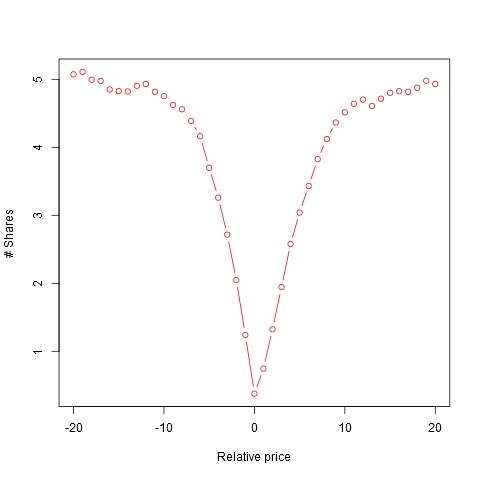

In [7]:
%%R
# Figure 2: Average book shape (This take some time to run!)

logging <- F # Very important for speed!

alpha <- 1
mu <- 10
delta <- 1/5 
initializeBook5()
# Burn in for 1000 events
for(count in 1:100){
  generateEvent()
}
numEvents <- 100000 # Average over 100,000 events
avgBookShape <- bookShape(20)/numEvents
for(count in 2:numEvents){
  generateEvent()
  avgBookShape <- avgBookShape+bookShape(20)/numEvents
}

plot(-20:20,avgBookShape,main=NA,xlab="Relative price",ylab="# Shares", col="red", type="b")

Figure 2: Average book shape over 100,000 events with $\alpha$ = 1, $\mu$ = 10, $\delta$ = 1/5. Note that asymptotic book depth is $\alpha/\delta$ = 5.

## Price signal in the  ZI simulation

* Even in the ZI model, the shape of the order book allows prediction of price movements.

    * Traders really would need to have zero intelligence not to condition on book shape!

<h2><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/01/asymmetry.png" align = "center" width=750></h2>

Figure 3: With one share at best offer, future price change vs size at best bid.

## Further developments in ZI models

* [Cont, Stoikov and Talreja]<sup id="cite_ref-ContStoikovTalreja" class="reference"><a href="#cite_note-ContStoikovTalreja"><span>[</span>5<span>]</span></a></sup> analyze a generalized SFGK zero-intelligence (ZI) model as a Markov chain.

* They show how to compute conditional probabilities using Laplace transform techniques.  For example:
    
    * The probability that the mid-price increases at its next move.
        
        * Depends on the order book imbalance.
    
    * The probability of executing an order before the mid-price moves.
    
    * The probability of making the spread.
    
        * Of interest to market makers.  Cancel limit orders if price is going to move!
    
    * [Cont, Stoikov and Talreja]<sup id="cite_ref-ContStoikovTalreja" class="reference"><a href="#cite_note-ContStoikovTalreja"><span>[</span>5<span>]</span></a></sup> choose a limit order arrival ("rain") distribution and a cancelation distribution (by $\Delta$) so as to match observed average book shapes for a Japanese stock.
    


## Cont and de Larrard

[Cont and de Larrard]<sup id="cite_ref-ContLarrard" class="reference"><a href="#cite_note-ContLarrard"><span>[</span>3<span>]</span></a></sup> consider the following caricature of the ZI model, appropriate for large tick stocks:

* Only quantities at the best bid and the best ask ($q_a$ and $q_b$ respectively) are considered.


* All order sizes are for one unit.  Cancelations are not proportional to existing quantity.


* $q_a$ and $q_b$ are independent.


* The price moves down if $q_b \downarrow 0$ and up if $q_a \downarrow 0$.


* After a price change, $q_a$ and $q_b$ are picked from a stationary distribution of queue sizes, independent of history (which could for example be empirically determined).

In fact, 

\begin{eqnarray*}
&& q_a(t) = N^{LS}_t - N^{MB}_t - N^{CA}_t \\
&& q_b(t) = N^{LB}_t - N^{MS}_t - N^{CB}_t 
\end{eqnarray*}

where 

* $N_t^{LS}$ and $N_t^{LB}$ are Poisson processes with intensity $\lambda$ corresponding to limit orders

* $N_t^{MS}$ and $N_t^{MB}$ are Poisson processes with intensity $\mu$ corresponding to market orders
 
* $N_t^{CA}$ and $N_t^{CB}$ are Poisson processes with intensity $\delta$ corresponding to cancelation of limit orders

All the processes are independent.

Hence, $q_a(t)$ and $q_b(t)$ are compound Poisson processes with intensity $\Lambda := \lambda + \mu + \delta$ and jump size $J$ distributed as

$$
J = \left\{\begin{array}{ll}
1 & \mbox{with probability } \frac{\lambda}{\lambda + \mu + \delta}; \\
\\
-1 & \mbox{with probability } \frac{\mu + \delta}{\lambda + \mu + \delta}.
\end{array}\right.
$$

[Cont and de Larrard]<sup id="cite_ref-ContLarrard" class="reference"><a href="#cite_note-ContLarrard"><span>[</span>3<span>]</span></a></sup> derive closed-form asymptotic expressions for the following quantities:

* Distribution of duration until the next price move.

* Probability of upward move in the price.

* Autocorrelation of price changes.

* Price volatility.


## Probability of price move up

Cont and de Larrard derive the following asymptotic expression assuming a balanced book (a book where the arrival rate of limit orders balances the arrival rates of market orders and cancelations):

<font color="red">
#### Proposition (Proposition 2 of Cont & de Larrard)
The probability $\phi(n,p)$ that the next price is an increase, conditioned on having $n$ orders at the bid and $p$ orders at the ask is:

$$
\phi(n,p)=\frac{1}{\pi}\,\int_0^\pi\,\left(2-\cos t-\sqrt{(2-\cos t)^2-1}\right)^p\,\frac{\sin {n\,t}\,\cos \frac{t}{2}}{\sin \frac{t}{2}}\, dt
$$
<font color="black">

* This leads to a natural expression for microprice in large tick markets!

## Infinitesimal generator 

The infinitesimal generator of the (two dimensional) process $q_a(t)$ and $q_b(t)$ is 

$$
\mathcal{L} u(x,y) = \lambda [u(x+h,y) + u(x,y+h) - 2u(x,y)] + (\mu + \delta)[u(x-h,y) + u(x,y-h) - 2u(x,y)] 
$$

where $h$ is the tick size. 

Assume $\lambda = \mu + \delta$, i.e., a balanced order book. Thus $\lambda = \mu + \delta = \frac\Lambda2$. $\mathcal{L}$ becomes

$$
\mathcal{L} u(x,y) = \frac\Lambda2 [u(x+h,y) + u(x,y+h) + u(x-h,y) + u(x,y-h) - 4 u(x,y)]
$$

## Boundary value problem for probability of up move

Denote $\tau_a = \inf\{t \geq 0: q_a(t) = 0\}$ and  $\tau_b = \inf\{t \geq 0: q_b(t) = 0\}$. In other words, $\tau_a$ ($\tau_b$ respectively) is the first time that the ask (bid respectively) side of the book is depleted.  

Let $u(x,y) = \PP\left[\tau_a \leq \tau_b|q_b = x, q_a = y \right]$. That is, $u$ is the probability that, conditioned on $q_b = x$ and $q_a = y$, the ask side is depleted before the bid side. Consequently, $u$ is the probability that the price moves up. 

Then $u$ satisfies the parital difference equation 

$$
\mathcal{L} u(x,y) = 0 \quad \Longleftrightarrow \quad u(x+h,y) + u(x,y+h) + u(x-h,y) + u(x,y-h) - 4 u(x,y) = 0, \quad \forall x, y > 0
$$

with boundary conditions 

$$
u(x,0) = 1, \; \forall x \geq 0 \quad \mbox{and} \quad u(0,y) = 0, \; \forall y \geq 0.
$$

The solution is given by $\phi$.

## Probability that next move is up

Let $\phi(x,y)$ be the probability that the next move is up given a bid size of $x$ and an ask size of $y$.  Then the boundary conditions for [(1)](#eq:laplacian) are $\phi(0,y)=0; \, \phi(x,0) = 1$.
<h2><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/01/Laplacian.png" align = "center" width=500></h2>


## A heuristic asymptotic analysis

Recall the difference equation for $u$

$$
u(x+h,y) + u(x,y+h) + u(x-h,y) + u(x,y-h) - 4 u(x,y) = 0.
$$

Rewrite the last equation as 

$$
\frac1{h^2} \left[u(x+h,y) + u(x-h,y) - 2 u(x,y) \right] + \frac1{h^2} \left[u(x,y+h) + u(x,y-h) - 2 u(x,y)\right] = 0.
$$

In the limit, as $h \to 0$, the difference equation converges to the Laplace equation

<a name="eq:laplacian"></a>(1)
$$
\Delta u = u_{xx} + u_{yy} = 0 
$$

with boundary condition $u(x,0) = 1$ and $u(0,y) = 0$. 

Hence, for small $h$, we would expect the solution from PDE is approximately equal to the solution from difference equation.  


## Solving Laplace equation 

Rewriting [(1)](#eq:laplacian) in polar coordinates $(r,\theta)$ gives

$$
\Delta u(x,y) =  \frac{\p^2 u}{\p r^2}+\frac 1 r \,\frac{\p u}{\p r}+ \frac 1 {r^2}\frac{\p^2 u}{\p \theta^2}.
$$

Radial symmetry gives $\p_r u = 0$ so this equation simplifies to

$$
\frac{\p^2 u}{\p \theta^2} = 0.
$$

with solution

$$
u(r,\theta)= a \, \theta+ b.
$$

Applying the boundary conditions, $u(r,\pi/2)=0$ and $u(r,0) = 1$ gives

$$
u(x,y)= u(r,\theta) = 1-\frac 2 \pi \,\theta = 1-\frac 2 \pi \,\arctan \frac{y}{x}=\frac 2 \pi \,\arctan \frac x y.
$$


## Asymptotic vs Cont and de Larrard formula

We set $y=1$ and plot $\phi(x,1)$ vs $x$.

<h2><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/01/TaiHoVsCont.png" align = "center" width=500></h2>
Figure 4: The blue line is simply $\frac 2 \pi \,\arctan \frac{x}{y}$; the red dashed line is the Cont and de Larrard formula $\frac{1}{\pi}\,\int_0^\pi\,dt\,\left(2-\cos t-\sqrt{(2-\cos t)^2-1}\right)^y\,\frac{\sin {x\,t}\,\cos \frac{t}{2}}{\sin \frac{t}{2}}$

## Microprice

Now that we have the probability of an up-tick, we may define a quantity which we may consider as an estimate of the efficient price.

Denote the spread by $s$ and the mid-price by $M_t=(B_t+A_t)/2$.  Then we may define the  <span>* microprice*</span> $S_t$   as

<a name="eq:microprice"></a>(2)
\begin{eqnarray}
S_t &=& \mbox{mid-price} + \mbox{half spread} \times \mbox{expected price move} \\
&=& M_t + \frac s 2 \, \left\{2\,\phi(q_b,q_a)-1\right\}\nonumber\\
&\approx&M_t + \frac s 2 \,\left\{\frac 4\pi \,\arctan \frac {q_b} {q_a}-1\right\}.
\end{eqnarray}

* If $q_b \ll q_a$, $S_t \approx M_t- s/2 = B_t$.

* If $q_b \gg q_a$, $S_t \approx M_t+ s/2 = A_t$.


## Order book imbalance

[Lipton, Pesavento and Sotiropoulos]<sup id="cite_ref-LPS" class="reference"><a href="#cite_note-LPS"><span>[</span>6<span>]</span></a></sup> define the *order book imbalance*

$$
I = \frac{ q_b-q_a}{q_b+q_a}.
$$

In terms of $I$,  the microprice [(2)](#eq:microprice) becomes

\begin{eqnarray}
S_t &\approx&M_t + \frac s 2 \,\left\{\frac 4\pi \,\arctan \frac {q_b} {q_a}-1\right\}\\
&=&M_t + \frac s 2 \,\frac 4\pi \,\arctan \frac{ q_b-q_a}{q_b+q_a}\\
&=&M_t + \frac s 2 \,\frac 4\pi \,\arctan I.
\end{eqnarray}

* We see that book imbalance seems to be the right variable in the sense that $S_t$ is linear in $I$ for small $I$.

    * Moreover, $I$ is anti-symmetric in $q_b$ and $q_a$.


## Order book imbalance empirically

<h2><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/01/LPSfig1.png" align = "center" width=550></h2>

Figure 5: Empirical average price move and expected time to next tick from [Lipton, Pesavento and Sotiropoulos]<sup id="cite_ref-LPS" class="reference"><a href="#cite_note-LPS"><span>[</span>6<span>]</span></a></sup>

## Graph of microprice vs order book imbalance

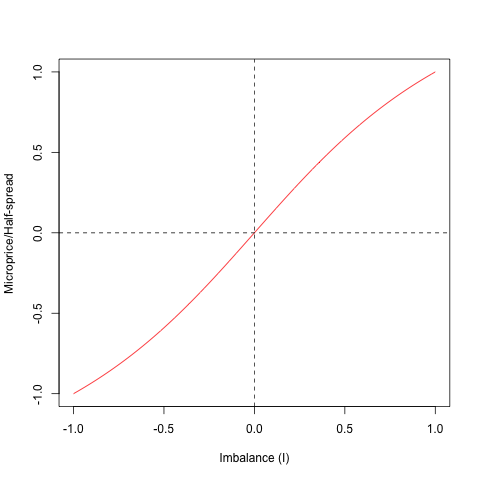

In [6]:
%%R
# Figure 6: Microprice vs order book imbalance 
mPrice <- function(imbalance){4/pi*atan(imbalance)}
curve(mPrice(x),from=-1,to=1,col="red",xlab="Imbalance (I)",ylab="Microprice/Half-spread")
abline(h=0,lty=2)
abline(v=0,lty=2)

Figure 6: Microprice as a function of the order book imbalance I

* It looks nearly linear!

## Price signal in the  ZI simulation vs book imbalance

<h2><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/01/asymmetryImbalance.png" align = "center" width=650></h2>
Figure 7: With one share at best offer, future price change vs book imbalance

## Price signal in the  ZI simulation vs microprice

<h2><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/01/asymmetryMicroprice.png" align = "center" width=650></h2>
Figure 8: With one share at best offer, future price change vs microprice

### References

<br />

<div class="reflist" style="list-style-type: decimal;">

<ol>

  <li id="cite_note-AbergelJedidi"><span class="mw-cite-backlink"><b><a href="#cite_ref-AbergelJedidi">^</a></b></span> Frédéric Abergel and Aymen Jedidi, A Mathematical Approach to Order Book Modeling, <span>* International Journal of Theoretical and Applied Finance*</span>, <span>**16**(5)</span> 1350025-1350040 (2013).</li>

  <li id="cite_note-BouchaudFarmerLillo"><span class="mw-cite-backlink"><b><a href="#cite_ref-BouchaudFarmerLillo">^</a></b></span>   Jean-Philippe Bouchaud, J. Doyne Farmer, and Fabrizio Lillo, How Markets Slowly Digest Changes in Supply and Demand, in <span>* Handbook of Financial Markets: Dynamics and Evolution*</span> 57-156. (2009) available at http://tuvalu.santafe.edu/%7Ejdf/papers/MarketsSlowlyDigest.pdf: Sections 2.2 and 2.9.3.</li>

  <li id="cite_note-ContLarrard"><span class="mw-cite-backlink"><b><a href="#cite_ref-ContLarrard">^</a></b></span>   Rama Cont and Adrien de Larrard, Price dynamics in a Markovian limit order market, <span>* SIAM J. Finan. Math.*</span>,  <span>** 4**</span>(1) 1-25 (2013).</li>
  
  <li id="cite_note-ContLarrard2"><span class="mw-cite-backlink"><b><a href="#cite_ref-ContLarrard2">^</a></b></span>   Rama Cont and Adrien de Larrard, Order book dynamics in liquid markets: limit theorems and diffusion approximations, <span>* SSRN*</span>, (2011).</li>
  
    <li id="cite_note-ContStoikovTalreja"><span class="mw-cite-backlink"><b><a href="#cite_ref-ContStoikovTalreja">^</a></b></span>   Rama Cont, Sasha Stoikov and Rishi Talreja, A stochastic model for order book dynamics,
<span>* Operations Research*</span>,  <span>**58**</span> 549-563 (2010).</li>

    <li id="cite_note-LPS"><span class="mw-cite-backlink"><b><a href="#cite_ref-LPS">^</a></b></span>   Alexander Lipton, Umberto Pesavento, and Michael G Sotiropoulos, Trade arrival dynamics and quote imbalance in a limit order book, <span>* arXiv*</span> (2013).</li>
  
</ol>